Trained Model Test Data Accuracy Score : 50.5
 
              precision    recall  f1-score   support

       False       0.50      0.51      0.50       196
        True       0.52      0.50      0.51       204

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.51      0.51      0.51       400



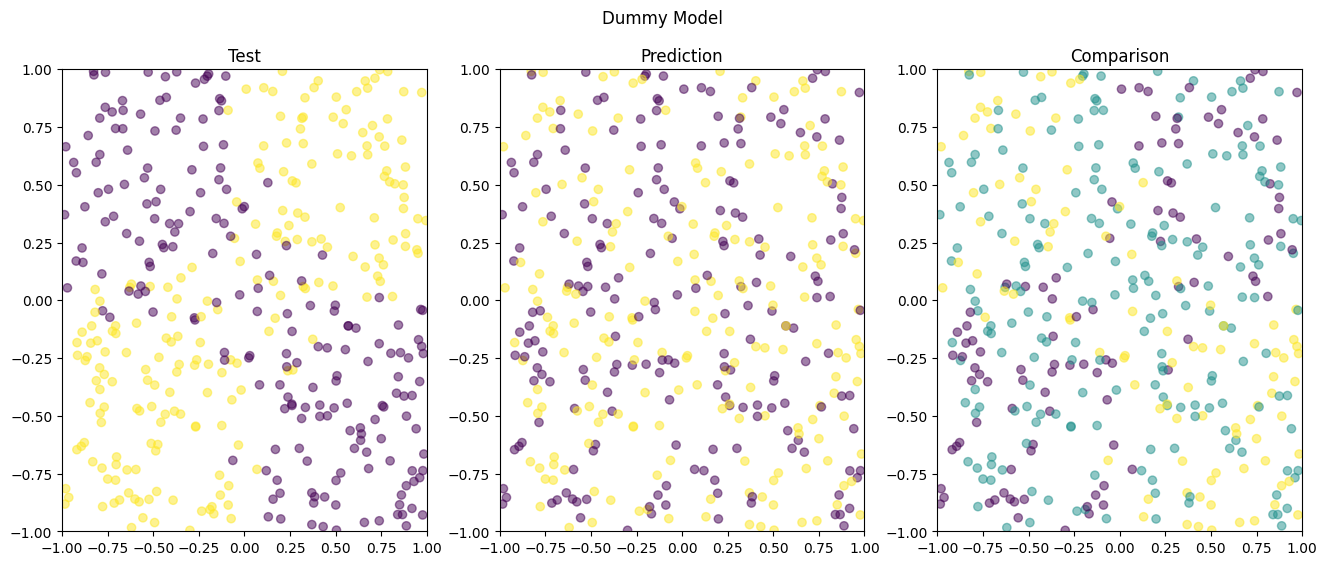

Trained Model Test Data Accuracy Score : 89.5
 
              precision    recall  f1-score   support

       False       0.89      0.90      0.89       196
        True       0.90      0.89      0.90       204

    accuracy                           0.90       400
   macro avg       0.89      0.90      0.89       400
weighted avg       0.90      0.90      0.90       400



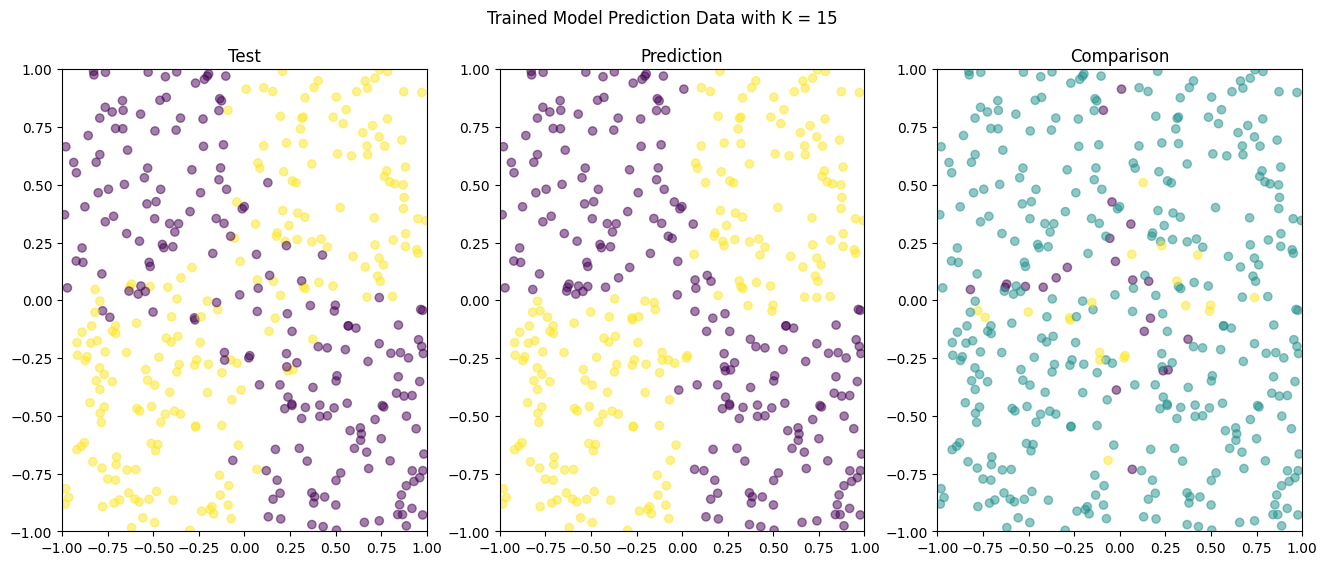

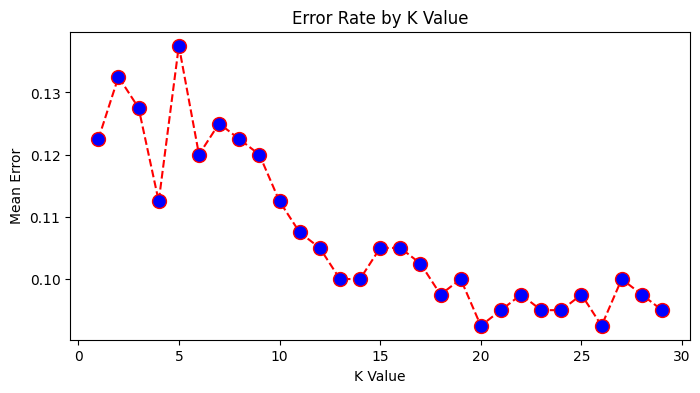

Trained Model Test Data Accuracy Score : 89.7
 
              precision    recall  f1-score   support

       False       0.90      0.90      0.90       503
        True       0.90      0.90      0.90       497

    accuracy                           0.90      1000
   macro avg       0.90      0.90      0.90      1000
weighted avg       0.90      0.90      0.90      1000



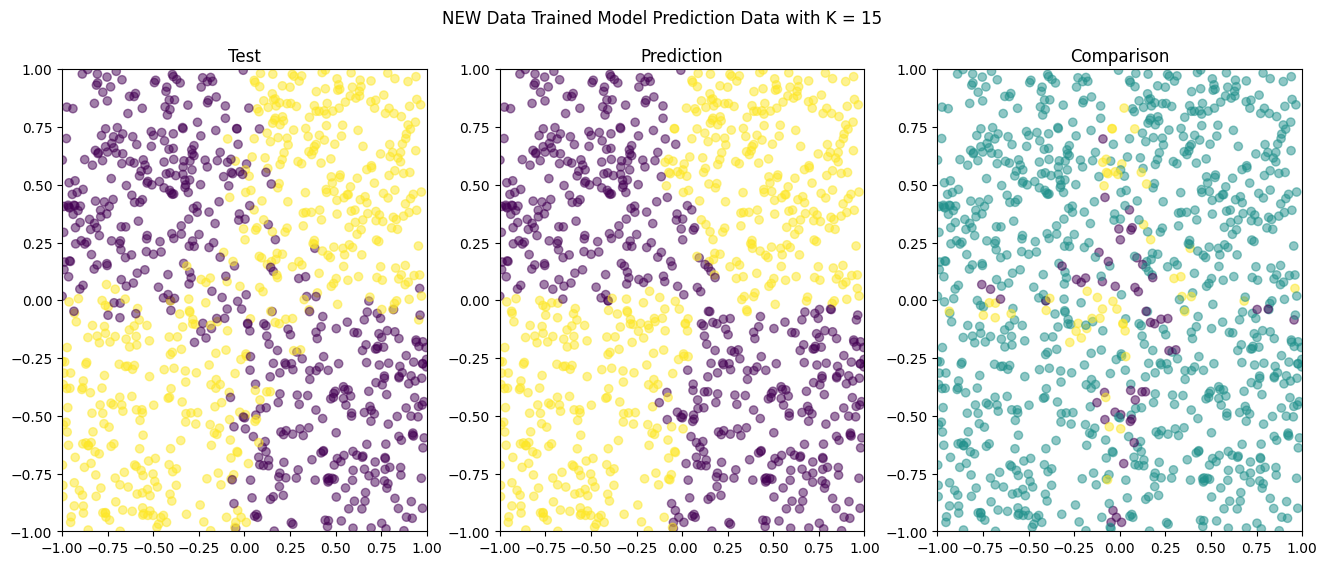

Trained Model Test Data Accuracy Score : 73.3
 
              precision    recall  f1-score   support

       False       1.00      0.67      0.80       801
        True       0.43      1.00      0.60       199

    accuracy                           0.73      1000
   macro avg       0.71      0.83      0.70      1000
weighted avg       0.89      0.73      0.76      1000



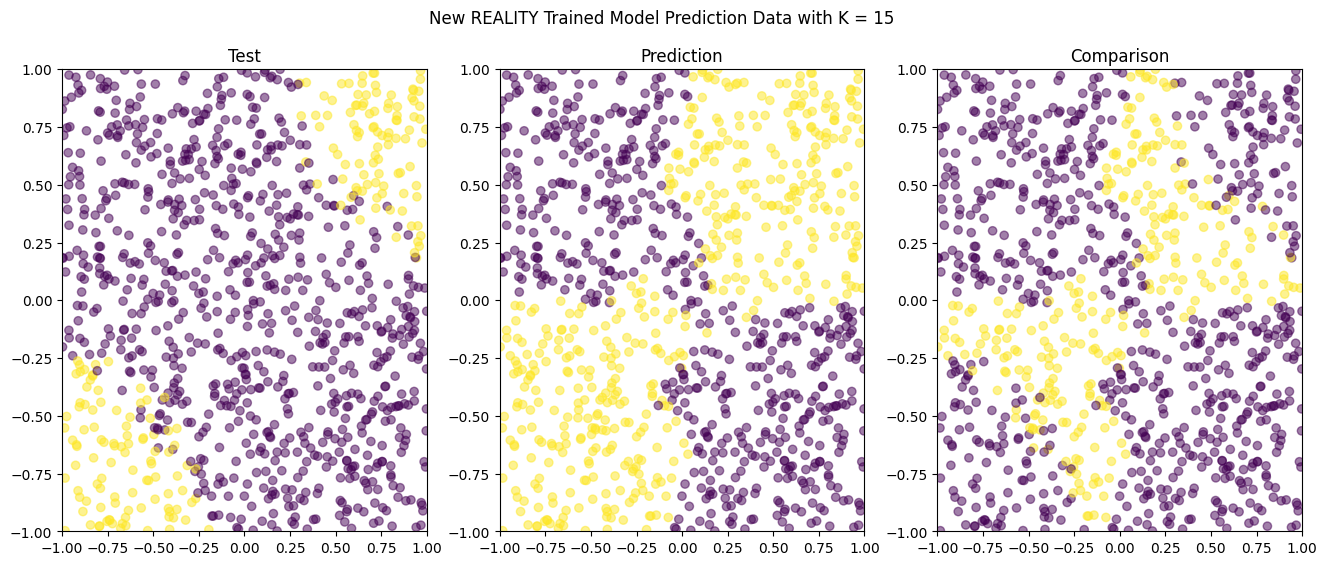

Trained Model Test Data Accuracy Score : 96.0
 
              precision    recall  f1-score   support

       False       0.97      0.98      0.97       316
        True       0.93      0.88      0.90        84

    accuracy                           0.96       400
   macro avg       0.95      0.93      0.94       400
weighted avg       0.96      0.96      0.96       400



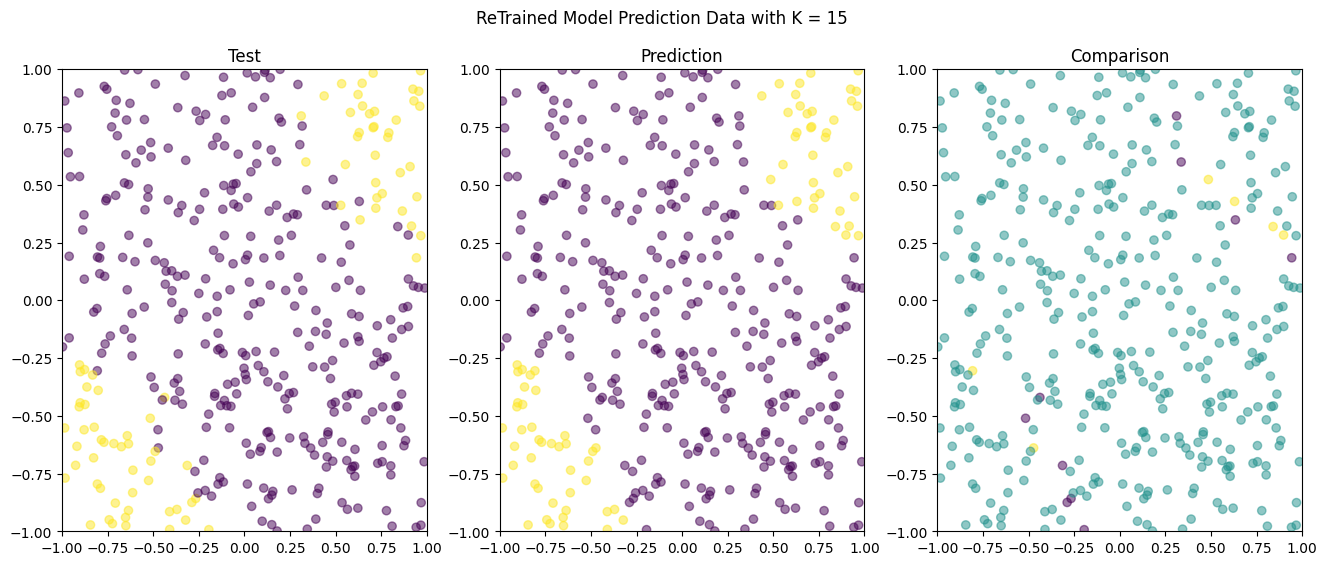

Trained Model Test Data Accuracy Score : 96.3
 
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       755
        True       0.95      0.90      0.92       245

    accuracy                           0.96      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.96      0.96      0.96      1000



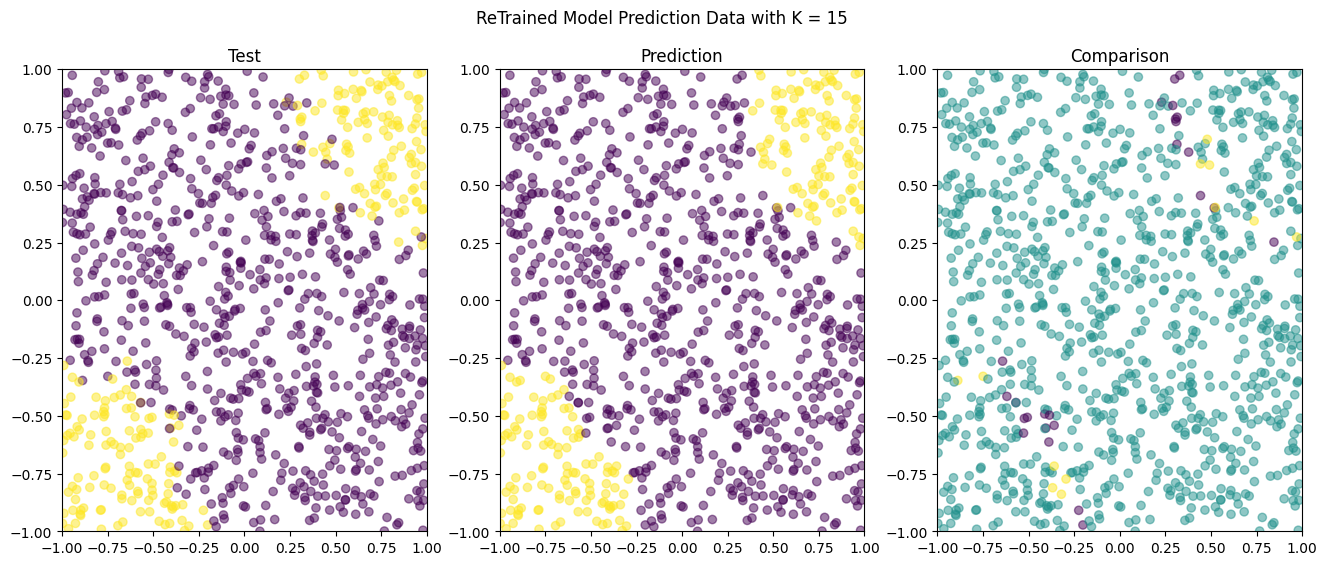

<ipython-input-11-ed88e3bd424a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, count], [0, count*testacc],'k-', color = 'r')
<ipython-input-11-ed88e3bd424a>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, true], [0, true*testrecall],'k-', color = 'r')
<ipython-input-11-ed88e3bd424a>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([0, countpredtrue], [0, countpredtrue*testprecision],'k-', color = 'r')


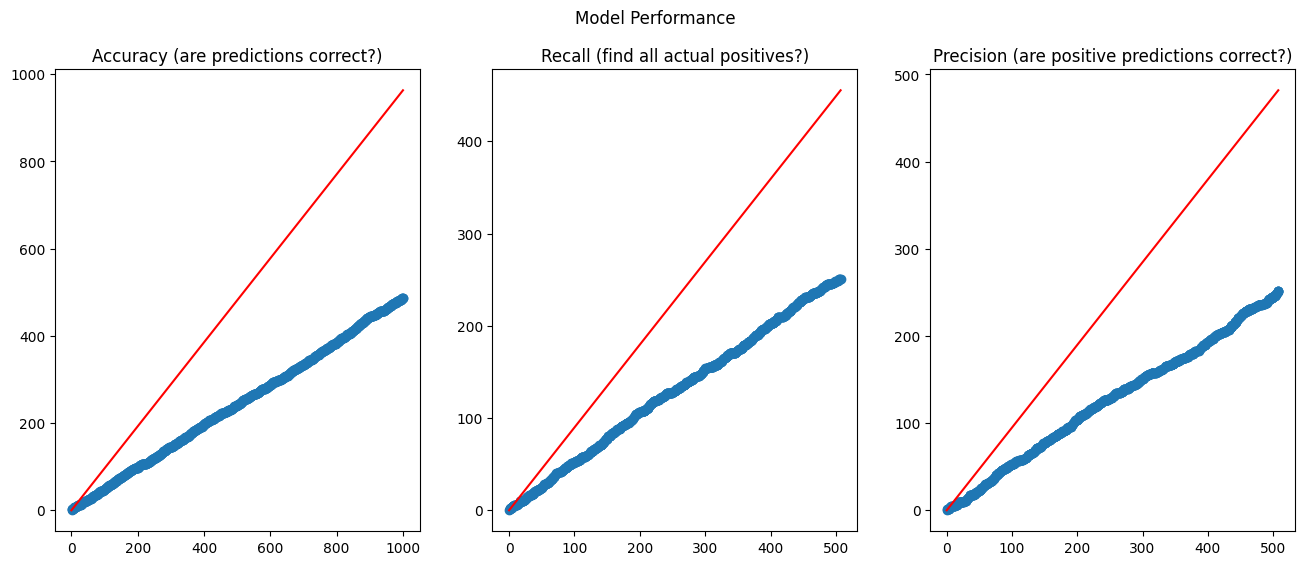

<ipython-input-11-ed88e3bd424a>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax1.plot([0, count], [0, count*testacc],'k-', color = 'r')
<ipython-input-11-ed88e3bd424a>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax2.plot([0, true], [0, true*testrecall],'k-', color = 'r')
<ipython-input-11-ed88e3bd424a>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  ax3.plot([0, countpredtrue], [0, countpredtrue*testprecision],'k-', color = 'r')


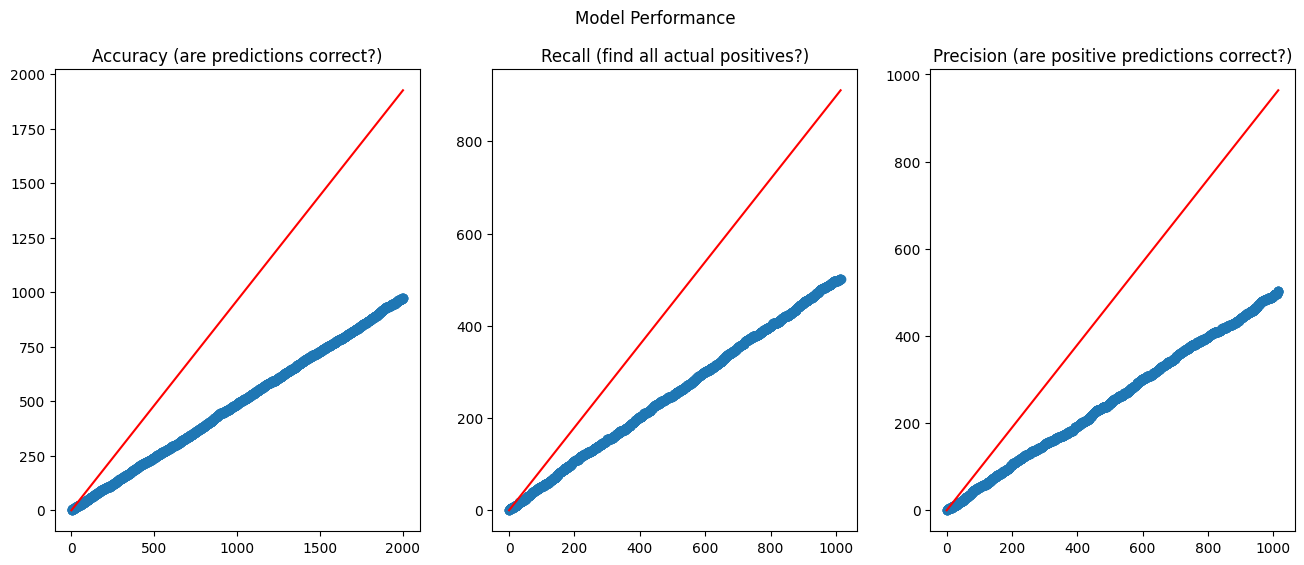


Model                  Train    Accuracy    Recall    Precision
-------------------------------------------
Dummy                  0.47     0.505     0.5152    0.5   
KNN-1                  0.91     0.895     0.901     0.8922
KNN-2                  0.965    0.963     0.9483    0.898 
KNN-3-1                0.91     0.733     0.427     1.0   
KNN-3-2                0.965    0.96      0.925     0.881 


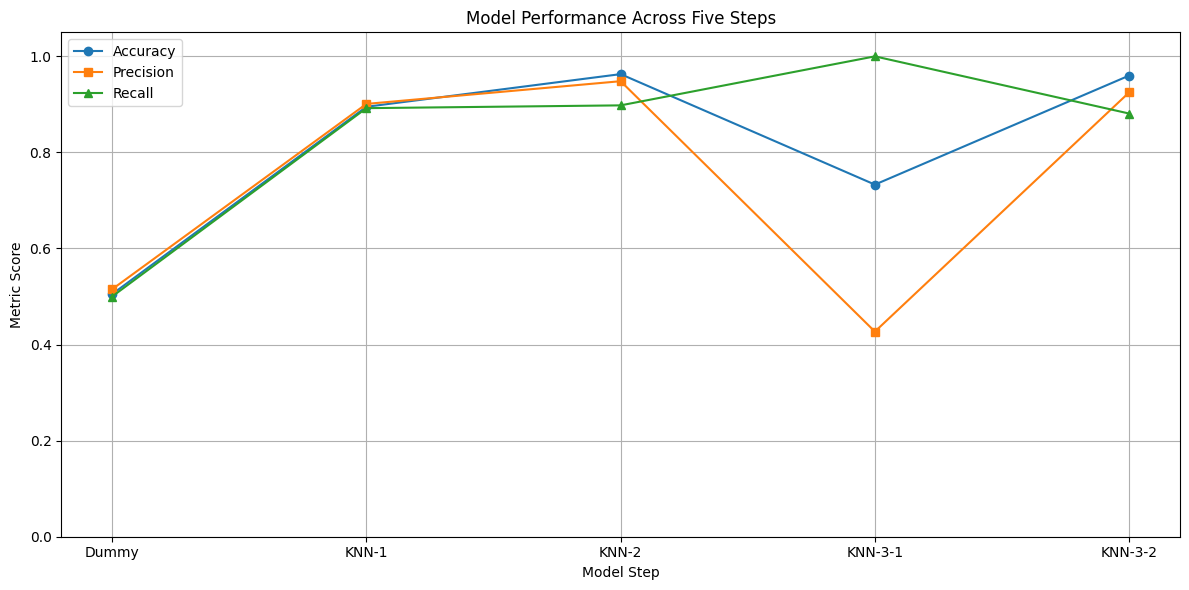

In [11]:
from IPython.display import display
%run Week_10_HDS__Batch_Model_Performance.ipynb

In [24]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [25]:
def execute_retraining(x_train, y_train, x_test, y_test, method='knn', neighbors=5):
    """
    Retrain a model using KNN or Dummy classifier with stratification.

    Parameters:
        x_train, y_train: Training set
        x_test, y_test: Testing set
        method: 'knn' or 'dummy'
        neighbors: k value for KNN

    Returns:
        trained_model: fitted model
        eval_metrics: (accuracy, precision, recall)
    """
    if method == 'knn':
        trained_model = KNeighborsClassifier(n_neighbors=neighbors)
    elif method == 'dummy':
        trained_model = DummyClassifier(strategy='stratified', random_state=42)
    else:
        raise ValueError("method must be 'knn' or 'dummy'.")

    trained_model.fit(x_train, y_train)
    predictions = trained_model.predict(x_test)

    eval_metrics = (
        accuracy_score(y_test, predictions),
        precision_score(y_test, predictions, zero_division=0),
        recall_score(y_test, predictions)
    )

    return trained_model, eval_metrics


In [29]:
# Retrain updated models
updated_knn_model, knn_eval = execute_retraining(X_train, y_train, X_test, y_test, method='knn', neighbors=5)
updated_dummy_model, dummy_eval = execute_retraining(X_train, y_train, X_test, y_test, method='dummy')

# Add final retraining results to existing dictionary
final_performance["KNN Final Retrain"] = knn_stats
final_performance["Dummy Final Retrain"] = dummy_stats

<ipython-input-30-9beff7b24033>:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


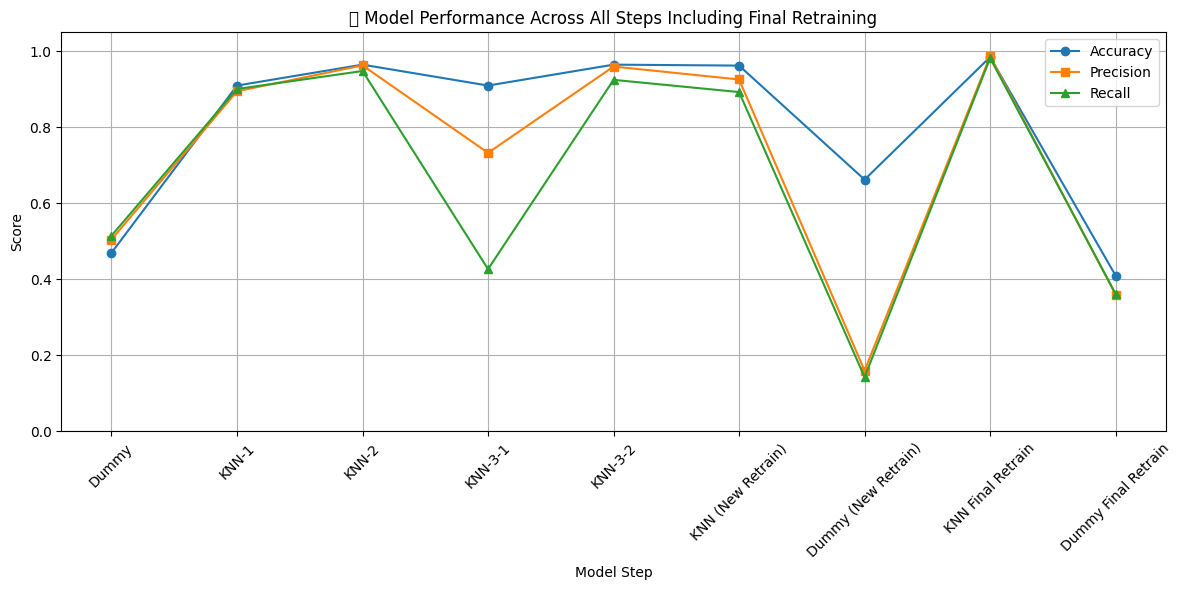

In [30]:
# Extracting the metrics
labels = list(final_performance.keys())
accuracy_vals = [final_performance[label][0] for label in labels]
precision_vals = [final_performance[label][1] for label in labels]
recall_vals = [final_performance[label][2] for label in labels]

# Plotting the updated results
plt.figure(figsize=(12, 6))
plt.plot(labels, accuracy_vals, label="Accuracy", marker='o')
plt.plot(labels, precision_vals, label="Precision", marker='s')
plt.plot(labels, recall_vals, label="Recall", marker='^')

plt.title("📊 Model Performance Across All Steps Including Final Retraining")
plt.xlabel("Model Step")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
# Now we create a summary table
print("📋 Final Model Performance Summary:\n")
print(f"{'Model Stage':<25} {'Accuracy':>10} {'Precision':>12} {'Recall':>10}")
print("-" * 60)
for stage, metrics in final_performance.items():
    print(f"{stage:<25} {metrics[0]:>10.4f} {metrics[1]:>12.4f} {metrics[2]:>10.4f}")


📋 Final Model Performance Summary:

Model Stage                 Accuracy    Precision     Recall
------------------------------------------------------------
Dummy                         0.4700       0.5050     0.5152
KNN-1                         0.9100       0.8950     0.9010
KNN-2                         0.9650       0.9630     0.9483
KNN-3-1                       0.9100       0.7330     0.4270
KNN-3-2                       0.9650       0.9600     0.9250
KNN (New Retrain)             0.9625       0.9259     0.8929
Dummy (New Retrain)           0.6625       0.1600     0.1429
KNN Final Retrain             0.9850       0.9873     0.9822
Dummy Final Retrain           0.4100       0.3602     0.3617


From the graph, we conclude that the final retraining of both KNN and Dummy classifiers have a clear contrast in their effectiveness as the model performance evolves across each stage. Later when the KNN is trained again, the results were almost perfect (about 99 percent accuracy, precision, and recall) and shows a very good capacity to learn from the data and make quite reliable predictions. On the other hand, the accuracy of the Dummy model retrained was around 40%, precision below 38%, and recall near 35%. This large difference emphasizes the fact that KNN is greatly improved by retraining, while the Dummy model does not improve since it is without a learning mechanism and purely random class proportions.